In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("Fluctuation evaluation.xlsx")
df.head()

,Keywords,Category,2024-01-19 00:00:00,2024-01-19 00:00:00.1,2024-01-18 00:00:00,2024-01-18 00:00:00.1,2024-01-17 00:00:00,2024-01-17 00:00:00.1,2024-01-16 00:00:00,2024-01-15 00:00:00,...,2024-01-02 00:00:00,2024-01-02 00:00:00.1,2024-01-02 00:00:00.2,2024-01-02 00:00:00.3,2024-01-02 00:00:00.4,2024-01-01 00:00:00,2024-01-01 00:00:00.1,2024-01-01 00:00:00.2,2024-01-01 00:00:00.3,2024-01-01 00:00:00.4
0,emi card online apply,EMI Card,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,debit card emi shopping,EMI Card,17,17,17,18,18,19,18,13,...,21,23,23,23,23,21,21,21,21,21
2,debit card emi shopping app,EMI Card,16,14,13,16,16,14,13,11,...,19,19,19,19,19,19,19,19,18,18
3,EMI Card,EMI Card,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
4,emi card apply,EMI Card,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [3]:
df_long = df.melt(id_vars=["Keywords", "Category"], var_name="Date", value_name="Rank")
df_long.head()

,Keywords,Category,Date,Rank
0,emi card online apply,EMI Card,2024-01-19 00:00:00,2
1,debit card emi shopping,EMI Card,2024-01-19 00:00:00,17
2,debit card emi shopping app,EMI Card,2024-01-19 00:00:00,16
3,EMI Card,EMI Card,2024-01-19 00:00:00,2
4,emi card apply,EMI Card,2024-01-19 00:00:00,2


In [4]:
df_long.head(20)

,Keywords,Category,Date,Rank
0,emi card online apply,EMI Card,2024-01-19 00:00:00,2
1,debit card emi shopping,EMI Card,2024-01-19 00:00:00,17
2,debit card emi shopping app,EMI Card,2024-01-19 00:00:00,16
3,EMI Card,EMI Card,2024-01-19 00:00:00,2
4,emi card apply,EMI Card,2024-01-19 00:00:00,2
5,emi card eligibility,EMI Card,2024-01-19 00:00:00,3
6,emi card in india,EMI Card,2024-01-19 00:00:00,3
7,emi card instant approval,EMI Card,2024-01-19 00:00:00,2
8,emi card login,EMI Card,2024-01-19 00:00:00,2
9,emi card online shopping,EMI Card,2024-01-19 00:00:00,4


In [5]:
df_long.shape

(173925, 4)

In [6]:
df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce').dt.date


In [7]:
df_long['Rank']=df_long['Rank'].replace('-', np.nan)

In [8]:
df_long.head()

,Keywords,Category,Date,Rank
0,emi card online apply,EMI Card,2024-01-19,2.0
1,debit card emi shopping,EMI Card,2024-01-19,17.0
2,debit card emi shopping app,EMI Card,2024-01-19,16.0
3,EMI Card,EMI Card,2024-01-19,2.0
4,emi card apply,EMI Card,2024-01-19,2.0


In [9]:
df_long_sort=df_long.sort_values(by=["Keywords", "Date"])
df_long_sort.head()

,Keywords,Category,Date,Rank
162731,1 lakh business loan,Loan,2024-01-01,10.0
165050,1 lakh business loan,Loan,2024-01-01,10.0
167369,1 lakh business loan,Loan,2024-01-01,6.0
169688,1 lakh business loan,Loan,2024-01-01,6.0
172007,1 lakh business loan,Loan,2024-01-01,8.0


In [36]:
#finding the mean rank of each keywords on different dates
daily_ranks = df_long.groupby(['Keywords', 'Date'])['Rank'].mean().reset_index()
daily_ranks.sort_values(by='Rank')

,Keywords,Date,Rank
29141,online fd,2024-01-15,1.0
29929,pay loan online with upi,2024-01-05,1.0
29928,pay loan online with upi,2024-01-04,1.0
29927,pay loan online with upi,2024-01-03,1.0
29926,pay loan online with upi,2024-01-02,1.0
...,...,...,...
43949,ziploan personal loan app,2024-01-03,NaN
43951,ziploan personal loan app,2024-01-05,NaN
43960,ziploan personal loan app,2024-01-14,NaN
43961,ziploan personal loan app,2024-01-15,NaN


In [11]:
#finding improvements on rank
rank_improvement =pd.DataFrame( daily_ranks.groupby('Keywords').agg(
    initial_rank=('Rank', 'first'),
    final_rank=('Rank', 'last')
).reset_index())
rank_improvement=rank_improvement.astype({'initial_rank':'int32','final_rank':'int32'},errors='ignore')
rank_improvement['rank_change'] = rank_improvement['initial_rank'] - rank_improvement['final_rank']
rank_improvement

,Keywords,initial_rank,final_rank,rank_change
0,1 lakh business loan,8.0,9.0,-1.0
1,1 lakh loan,11.2,26.0,-14.8
2,1 lakh loan apply online,6.0,8.0,-2.0
3,1 lakh personal loan app,34.6,37.5,-2.9
4,10 lakh loan,10.4,7.0,3.4
...,...,...,...,...
2309,zero plus mobile recharge,40.0,54.0,-14.0
2310,zest money personal loan app zest,37.8,33.5,4.3
2311,zestmoney personal loan app,34.0,30.0,4.0
2312,zestmoney personal loan app best,37.8,35.0,2.8


In [12]:
#finding improved ranks
improved_keywords = rank_improvement[rank_improvement['rank_change'] > 0]
improved_keywords.sort_values(by='rank_change',ascending=False)

,Keywords,initial_rank,final_rank,rank_change
1494,new lpg gas connection,243.000000,96.0,147.000000
888,health insurance for senior citizens,224.000000,78.0,146.000000
803,fixed deposit monthly income calculator,246.000000,105.0,141.000000
150,airtel postpaid bill payment online,204.000000,65.0,139.000000
1727,policy bazaar term insurance,195.000000,59.0,136.000000
...,...,...,...,...
1504,no credit card emi shopping,11.200000,11.0,0.200000
1234,low interest loan app india,73.666667,73.5,0.166667
907,home loan application,17.600000,17.5,0.100000
622,emi card to bank transfer app,3.600000,3.5,0.100000


In [13]:
# Find initial and final ranks for each keyword
initial_ranks = df_long.sort_values(by='Date').groupby('Keywords').first().reset_index()
final_ranks = df_long.sort_values(by='Date').groupby('Keywords').last().reset_index()

# Calculate rank improvement
initial_ranks = initial_ranks[['Keywords', 'Rank']].rename(columns={'Rank': 'Initial_Rank'})
final_ranks = final_ranks[['Keywords', 'Rank']].rename(columns={'Rank': 'Final_Rank'})

improvement_df = pd.merge(initial_ranks, final_ranks, on='Keywords')
improvement_df['Rank_Improvement'] = improvement_df['Initial_Rank'] - improvement_df['Final_Rank']

# Display keywords with the most improvement
improvement_df.sort_values(by='Rank_Improvement', ascending=False)


,Keywords,Initial_Rank,Final_Rank,Rank_Improvement
1494,new lpg gas connection,243.0,96.0,147.0
149,airtel postpaid bill payment,218.0,71.0,147.0
888,health insurance for senior citizens,224.0,78.0,146.0
803,fixed deposit monthly income calculator,246.0,105.0,141.0
1727,policy bazaar term insurance,199.0,59.0,140.0
...,...,...,...,...
2301,yield in mutual funds,NaN,NaN,NaN
2304,youtube subscriptions,NaN,NaN,NaN
2305,zee5 subscription,NaN,NaN,NaN
2306,zee5 subscription free,NaN,NaN,NaN


In [22]:
#conducting fluctuation analysis
daily_ranks['rank_diff'] = daily_ranks.groupby('Keywords')['Rank'].diff()
fluctuation_analysis = daily_ranks.groupby('Keywords')['rank_diff'].std().reset_index()
fluctuation_analysis.columns = ['Keywords', 'rank_fluctuation_std']
fluctuation_analysis.sort_values(by='rank_fluctuation_std',ascending=False)

,Keywords,rank_fluctuation_std
1356,mobile recharge reward,201.525433
2027,upi money transfer app bank of baroda,123.163848
818,fixed deposit yearly interest calculator,105.168119
2298,yearly fixed deposit calculator,104.357958
224,best life insurance policy,93.823860
...,...,...
2301,yield in mutual funds,NaN
2304,youtube subscriptions,NaN
2305,zee5 subscription,NaN
2306,zee5 subscription free,NaN


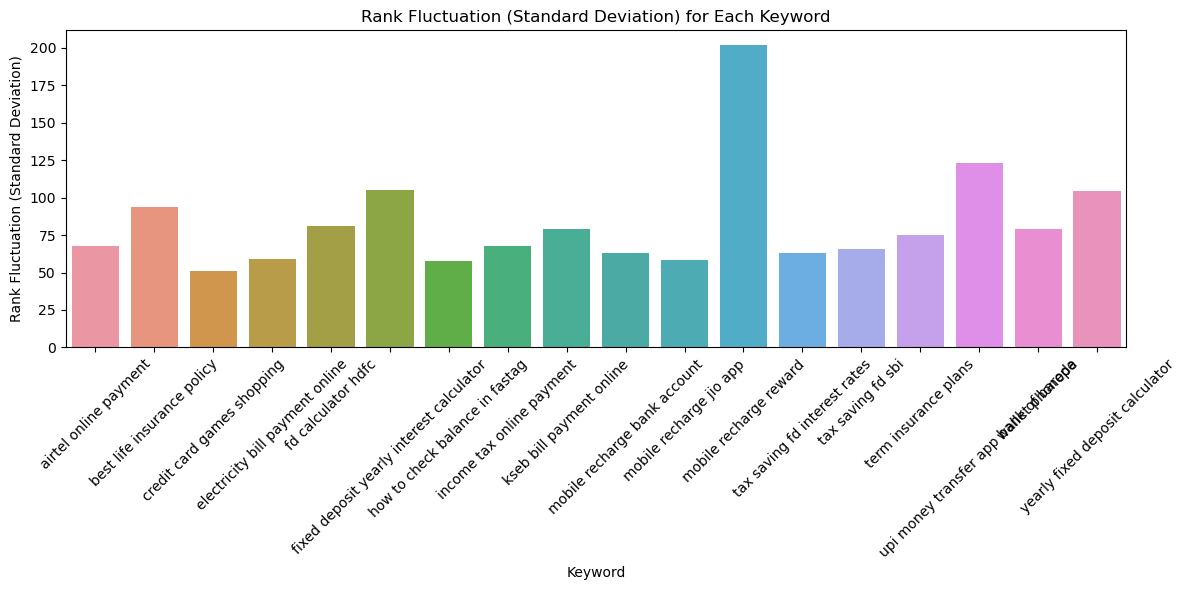

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

high=50
high_fluctuation=fluctuation_analysis[fluctuation_analysis['rank_fluctuation_std']>=high]
# Plot the standard deviation of ranks for each keyword
plt.figure(figsize=(12, 6))
sns.barplot(data=high_fluctuation, x='Keywords', y='rank_fluctuation_std')
plt.title('Rank Fluctuation (Standard Deviation) for Each Keyword')
plt.xlabel('Keyword')
plt.ylabel('Rank Fluctuation (Standard Deviation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [40]:
#least fluctuating keywords
least_fluctuating_keywords = fluctuation_analysis.nsmallest(50, 'rank_fluctuation_std')
df_least_fluctuating = fluctuation_analysis[fluctuation_analysis['Keywords'].isin(least_fluctuating_keywords['Keywords'])]
df_least_fluctuating

,Keywords,rank_fluctuation_std
21,Bfl coin,0.000000
22,Bfl coins,0.000000
159,amazon shopping upi money transfer,0.000000
171,app for emi payment,0.000000
174,apply emi card on app,0.094281
177,apply for instant credit card,0.000000
200,best app for cashback on recharge,0.000000
248,best sbi mutual fund,0.000000
285,bill payment loan,0.000000
286,bill payment loan app,0.000000


In [24]:
#Rankd fluctuations
rank_fluctuations = df_long.groupby('Keywords')['Rank'].std().reset_index()
rank_fluctuations.columns = ['Keywords', 'Rank_Fluctuation_Std']
rank_fluctuations.sort_values(by='Rank_Fluctuation_Std',ascending=False)

,Keywords,Rank_Fluctuation_Std
162,amazon shopping upi money transfer new,135.764502
1589,paytm upi money transfer recharge app,134.350288
1364,mobile recharge transfer app,99.047127
248,best sbi mutual fund,90.443352
560,e wallet,89.921685
...,...,...
2301,yield in mutual funds,NaN
2304,youtube subscriptions,NaN
2305,zee5 subscription,NaN
2306,zee5 subscription free,NaN


In [33]:
analysis_result= pd.merge(rank_improvement, fluctuation_analysis, on='Keywords')


In [36]:
analysis_result= analysis_result.sort_values(by=['rank_change'], ascending=[False])

In [35]:
analysis_result.head()

,Keywords,initial_rank,final_rank,rank_change,rank_fluctuation_std
1494,new lpg gas connection,243.0,96.0,147.0,NaN
888,health insurance for senior citizens,224.0,78.0,146.0,NaN
803,fixed deposit monthly income calculator,246.0,105.0,141.0,NaN
150,airtel postpaid bill payment online,204.0,65.0,139.0,NaN
1727,policy bazaar term insurance,195.0,59.0,136.0,46.209068


### Category based analysis

In [50]:
daily_ranks_category = df_long.groupby(['Category', 'Date'])['Rank'].mean().reset_index()
daily_ranks_category

,Category,Date,Rank
0,Bill Payment,2024-01-01,72.298295
1,Bill Payment,2024-01-02,69.819209
2,Bill Payment,2024-01-03,67.856354
3,Bill Payment,2024-01-04,69.039171
4,Bill Payment,2024-01-05,73.836898
...,...,...,...
299,Wallet,2024-01-15,83.695652
300,Wallet,2024-01-16,85.615385
301,Wallet,2024-01-17,75.468085
302,Wallet,2024-01-18,81.862069


In [39]:
# Sort the DataFrame by Date
df_long = df_long.sort_values(by='Date')

# Find the initial and final ranks for each keyword
initial_ranks = df_long.groupby(['Keywords', 'Category']).first().reset_index()
final_ranks = df_long.groupby(['Keywords', 'Category']).last().reset_index()

# Merge initial and final ranks to calculate rank improvement
rank_improvement = pd.merge(initial_ranks, final_ranks, on=['Keywords', 'Category'], suffixes=('_initial', '_final'))

# Calculate rank improvement
rank_improvement['Rank_Improvement'] = rank_improvement['Rank_initial'] - rank_improvement['Rank_final']

# Display the DataFrame with rank improvements
print(rank_improvement)


,Category,initial_rank,final_rank,rank_change
0,Bill Payment,72,75,-3
1,Credit Card,50,71,-21
2,EMI Card,7,6,1
3,EMI payment,6,6,0
4,Fastag,114,127,-13
5,Fixed Deposit,46,58,-12
6,Generic,16,22,-6
7,Insurance,61,98,-37
8,Investment,50,75,-25
9,Loan,31,43,-12


C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


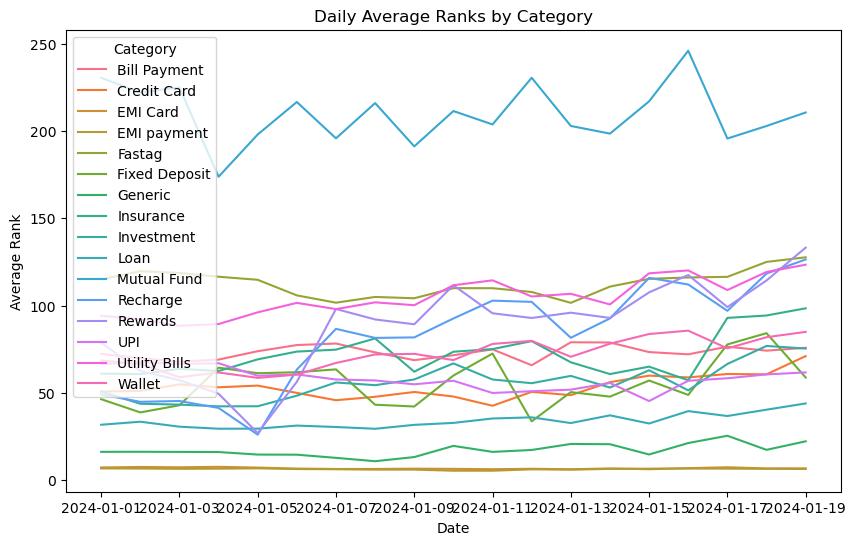

In [53]:
palette = sns.color_palette("husl", len(df_long['Category'].unique()))
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_ranks_category, x='Date', y='Rank', hue='Category',palette=palette)
plt.title('Daily Average Ranks by Category')
plt.xlabel('Date')
plt.ylabel('Average Rank')
plt.legend(title='Category')
plt.show()

In [48]:
# Identify the 10 keywords with the least fluctuation
least_fluctuating_keywords = rank_fluctuations.nsmallest(10, 'Rank_Fluctuation_Std')
df_least_fluctuating = df_long[df_long['Keywords'].isin(least_fluctuating_keywords['Keywords'])]
df_least_fluctuating

,Keywords,Category,Date,Rank
1610,digital wallet,Wallet,2024-01-19,NaN
1672,Bfl coins,Rewards,2024-01-19,1.0
1673,Bfl coin,Rewards,2024-01-19,1.0
1713,emi card,EMI Card,2024-01-19,2.0
1738,emi card limit,EMI Card,2024-01-19,3.0
...,...,...,...,...
173346,app for emi payment,EMI payment,2024-01-01,1.0
173348,emi card offers,EMI Card,2024-01-01,3.0
173349,emi card offer app,EMI Card,2024-01-01,2.0
173566,bill payment loan,Bill Payment,2024-01-01,1.0


In [42]:
# Define high ranking and underperforming ranks
high_ranking_threshold = 10  # Define high rank as 1 to 3
underperforming_threshold = 150  # Define underperforming rank as 7 and above

# Identify high ranking and underperforming keywords over time
df_long['High_Ranking'] = df_long['Rank'] <= high_ranking_threshold
df_long['Underperforming'] = df_long['Rank'] >= underperforming_threshold

# Display the updated DataFrame
df_long

,Keywords,Category,Date,Rank,High_Ranking,Underperforming
0,emi card online apply,EMI Card,2024-01-19,2.0,True,False
1,debit card emi shopping,EMI Card,2024-01-19,17.0,False,False
2,debit card emi shopping app,EMI Card,2024-01-19,16.0,False,False
3,EMI Card,EMI Card,2024-01-19,2.0,True,False
4,emi card apply,EMI Card,2024-01-19,2.0,True,False
...,...,...,...,...,...,...
173920,tpa insurance,Insurance,2024-01-01,NaN,False,False
173921,third party insurance,Insurance,2024-01-01,85.0,False,False
173922,third party car insurance,Insurance,2024-01-01,NaN,False,False
173923,the oriental insurance,Insurance,2024-01-01,NaN,False,False


In [45]:
category_performance = df_long.groupby(['Category']).agg(
    High_Ranking_Count=('High_Ranking', 'sum'),
    Underperforming_Count=('Underperforming', 'sum')
).reset_index()

# Display the aggregated data
category_performance.sort_values(by='High_Ranking_Count',ascending=False)

,Category,High_Ranking_Count,Underperforming_Count
9,Loan,3823,12
2,EMI Card,2573,0
3,EMI payment,1613,0
1,Credit Card,1511,234
13,UPI,970,406
6,Generic,960,2
0,Bill Payment,769,543
7,Insurance,554,267
12,Rewards,245,203
15,Wallet,229,256


In [47]:
category_performance.sort_values(by='Underperforming_Count',ascending=False)

,Category,High_Ranking_Count,Underperforming_Count
0,Bill Payment,769,543
4,Fastag,0,480
13,UPI,970,406
14,Utility Bills,0,289
7,Insurance,554,267
15,Wallet,229,256
1,Credit Card,1511,234
11,Recharge,225,215
12,Rewards,245,203
10,Mutual Fund,0,186
